In [ ]:
# default_exp exploratory_data_analysis

# exploratory_data_analysis

> API details.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import config

### Most Common Words

In [ ]:
data_dtm = pd.read_csv(config.LINKEDIN_JOBS_DTM, index_col="title")

In [ ]:
data_dtm = data_dtm.transpose()

In [ ]:
data_dtm.head()

title,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Software Engineer
aa,0,0,0,2,0
abilities,0,0,5,0,1
abilitiespreferred,1,0,0,0,0
abilitiesshow,1,0,0,0,0
ability,39,22,16,10,2


In [ ]:
# Find top 30 words in the job description:
top_dict = {}
for c in data_dtm.columns:
    top = data_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

In [ ]:
top_dict

{'Data Analyst': [('data', 257),
  ('business', 109),
  ('experience', 88),
  ('work', 76),
  ('skills', 55),
  ('team', 54),
  ('amp', 53),
  ('people', 48),
  ('management', 48),
  ('working', 47),
  ('investment', 40),
  ('ability', 39),
  ('clients', 39),
  ('analysis', 39),
  ('opportunity', 39),
  ('role', 36),
  ('help', 36),
  ('requirements', 35),
  ('world', 34),
  ('support', 34),
  ('strong', 32),
  ('insights', 30),
  ('analyst', 29),
  ('best', 28),
  ('reporting', 28),
  ('teams', 28),
  ('global', 27),
  ('technical', 26),
  ('knowledge', 24),
  ('new', 24)],
 'Data Engineer': [('data', 389),
  ('experience', 109),
  ('work', 75),
  ('team', 74),
  ('working', 66),
  ('business', 64),
  ('skills', 55),
  ('learning', 45),
  ('solutions', 44),
  ('engineer', 41),
  ('analytics', 40),
  ('tools', 40),
  ('role', 39),
  ('engineering', 39),
  ('design', 38),
  ('technical', 37),
  ('knowledge', 36),
  ('development', 36),
  ('sql', 33),
  ('building', 33),
  ('machine', 30

### Plot Wordcloud

In [ ]:
# !pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams['figure.figsize'] = [16, 6]

In [ ]:
jobs = pd.read_csv(config.LINKEDIN_JOBS_CLEAN)
jobs_sumary = jobs.groupby(["title"]).description.apply(lambda x: ','.join(x)).reset_index()

In [ ]:
jobs_sumary

,title,description
0,Data Analyst,about rolethe marketplace team tackles anz’s s...
1,Data Engineer,locationbrisbanecategoryengineering technica...
2,Data Scientist,job descriptiondata scientist janssen anzwor...
3,Machine Learning Engineer,· super performance bo...
4,Software Engineer,the companyglobal online employment market pla...


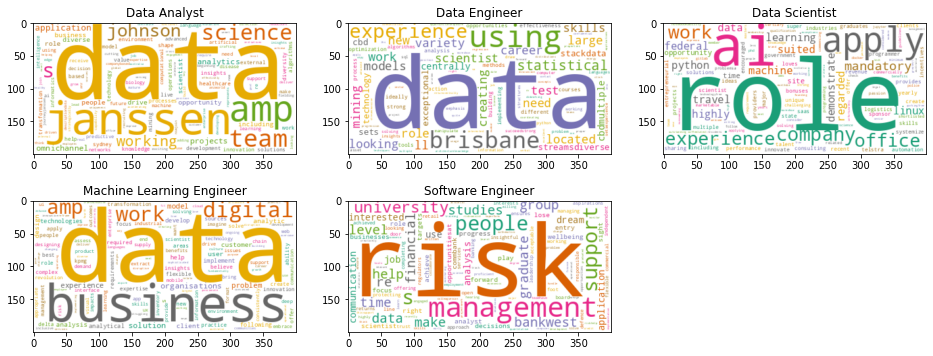

In [ ]:
# Plot word cloud
wcld = WordCloud(background_color="white", colormap="Dark2",
                max_font_size=150, random_state=42)

for index, title in enumerate(jobs_sumary.title):
    wcld.generate(jobs.loc[index,"description"])
    plt.subplot(2,3, index+1)
    plt.imshow(wcld, interpolation="bilinear")    
    plt.title(title)